# Dealing with High Dimensional Data

We are going to try different feature selectors

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format

## Step-1: High Dimensional Data

In [2]:
# data = pd.read_csv()
# do your EDA
# do your cleanup
# X = 
# y = 

In [3]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples = 50000,  # rows
    n_features =200,    # columns
    n_classes=2,    # binary classifier
    random_state=123)

In [4]:
print ("X.shape :", X.shape)
print ("y.shape :", y.shape)
print ("y labels :", np.unique(y))

# print some sample data, row 0
print (X[0])

X.shape : (50000, 200)
y.shape : (50000,)
y labels : [0 1]
[ 1.73891244 -1.18804012 -1.28358018 -0.54161286 -1.84167768 -0.08074319
 -1.28359196 -1.58095369  0.96948623  2.66567568  0.41127292  0.38108973
 -0.25240963 -0.55844604  1.07563465  0.0277148  -0.32735659 -0.25010415
 -0.24488672  1.91188512  0.70348063 -0.70871817 -0.65338254 -1.05397975
 -0.79492723  0.05899362 -0.88701505 -1.4792244  -1.3551333   0.78052601
  1.0127443  -0.93307074 -1.66203283 -1.06443259 -2.11999848  1.23413945
  0.422762    0.44261697  0.76274453  1.07075613  1.85146927  1.28708121
 -0.86083403  0.22324481 -0.44228435  0.11548223 -1.26228145  0.70408758
  2.06101952 -0.19186046  0.61176773 -0.74121454 -0.38345612 -1.67559239
 -0.30819127  1.34383366  1.01027749 -1.90022181 -0.90559364 -0.65121289
 -0.25605178 -0.06603191 -0.30990643  1.1332993  -0.4710367  -1.09062041
  1.10725614  2.48812407 -1.05659804  0.67720675 -1.22993607  0.51860894
 -0.01421047  2.37388524  0.04494114  0.47544967  0.37099537  0.5

In [5]:
# Let's select the following components
## TODO: change this and see the accuracy 
number_of_fetures_to_select = 5

## Scale Data

Scaling could be helpful

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler ()

X_scaled = scaler.fit_transform(X)
print (X_scaled[0])

[ 1.74720867 -1.19888868 -1.292611   -0.55084503 -1.83810184 -0.07405325
 -1.27360638 -1.57441442  0.97849581  2.65195111  0.40973095  0.37964833
 -0.2557605  -0.56544735  1.07348782  0.03762771 -0.32655611 -0.25182855
 -0.24916649  1.9069386   0.70394203 -0.70797185 -0.65576526 -1.04910909
 -0.79372929  0.0633992  -0.88857746 -1.47139906 -1.35279313  0.78734089
  1.01238364 -0.92760809 -1.6608378  -0.83503757 -2.12957737  1.22999048
  0.42586732  0.43701447  0.75546129  1.07571033  1.84360816  1.27399943
 -0.85600063  0.21458699 -0.4407686   0.11121154 -1.26104794  0.70218759
  2.06165283 -0.19076387  0.61076069 -0.74136976 -0.38689563 -1.66519333
 -0.30454469  1.34407446  1.01131133 -1.89544368 -0.90056726 -0.64099632
 -0.25218521 -0.06929873 -0.30809047  1.13606127 -0.47552028 -1.08075927
  1.10618013  2.49702228 -1.05157346  0.68172391 -1.22834788  0.51195283
 -0.01820573  2.38106795  0.04019698  0.47338981  0.37048001  0.58279072
 -0.21117299 -0.72606409  0.66258879 -1.27322402  0

## Step-2 : Train / Test Split

In [7]:
from sklearn.model_selection import train_test_split

## TODO : split data into train / test, with 20% for test
## hint : 20% is 0.2

X_train1,X_test1,y_train, y_test = train_test_split(X_scaled, y,  test_size=0.2, random_state=123)


print ("x_train1 :" , X_train1.shape )
print ("x_test1 :", X_test1.shape)
print ("y_train :", y_train.shape)
print ("y_test :", y_test.shape)

x_train1 : (40000, 200)
x_test1 : (10000, 200)
y_train : (40000,)
y_test : (10000,)


## Step-3: Do a quick logistic regression on **all** data

In [8]:
%%time

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier

algo = LogisticRegression()
# algo = RandomForestClassifier()
#algo = LinearSVC(max_iter=5000)
#algo = GradientBoostingClassifier()


## TODO: fit (X_train, y_train)
model1 = algo.fit(X_train1, np.ravel(y_train))

CPU times: user 664 ms, sys: 3.85 ms, total: 668 ms
Wall time: 108 ms


## Step-4: Evaluate

In [9]:
y_pred1 = model1.predict (X_test1)

print ("Train1 accuracy: ", model1.score(X_train1,y_train))
print ("Test1 accuracy: ", model1.score(X_test1, y_test))

Train1 accuracy:  0.9399
Test1 accuracy:  0.9381


In [10]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm_labels = np.unique(y)
cm_array1 = confusion_matrix(y_test, y_pred1)
#print (cm_array)

cm_df1 = pd.DataFrame(cm_array1, index=cm_labels, columns=cm_labels)
cm_df1

,0,1
0,4543,468
1,151,4838


[]

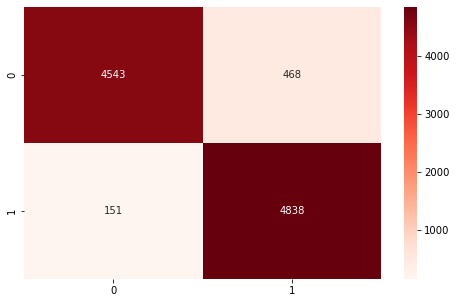

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8,5))

# colormaps : cmap="YlGnBu" , cmap="Greens", cmap="Blues",  cmap="Reds"
sns.heatmap(cm_df1, annot=True, cmap="Reds", fmt='d').plot()

## Step-5 : Reduce Dimension

We will try a few algorithms here.


### 5.1 - RFE

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

In [12]:
# %%time

# from sklearn.feature_selection import RFE

# # Defining the Classification function
# estimator = LogisticRegression()

# # Reducing dimensionality to 250 features for backward elimination model
# feature_selector = RFE(estimator=estimator, n_features_to_select=number_of_fetures_to_select, verbose=0)

# feature_selector = feature_selector.fit(X_scaled, y)

In [13]:
# # print indexes of features selected

# feature_selector.get_support(indices = True)

### 5.2 - SelectKBest

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html

In [14]:
# %%time 

# from sklearn.feature_selection import SelectKBest

# feature_selector = SelectKBest(k=number_of_fetures_to_select)

# feature_selector = feature_selector.fit(X_scaled, y)

In [15]:
# feature_selector.get_support(indices = True)

### 5.3 - PCA

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [16]:
%%time 

from sklearn.decomposition import PCA

feature_selector = PCA (n_components=number_of_fetures_to_select)

feature_selector = feature_selector.fit(X_scaled)

CPU times: user 1.17 s, sys: 20.5 ms, total: 1.19 s
Wall time: 172 ms


### 5.4 - FastICA

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FastICA.html?

In [17]:
# %%time 

# from sklearn.decomposition import FastICA

# feature_selector = FastICA(n_components=number_of_fetures_to_select, max_iter=1000, random_state=123) 

# feature_selector = feature_selector.fit(X_scaled)

### 5.5 - Factor Analysis

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html

In [18]:
# %%time

# # # Defining the number of factors
# from sklearn.decomposition import FactorAnalysis

# feature_selector = FactorAnalysis(n_components = number_of_fetures_to_select,random_state=123)

# feature_selector = feature_selector.fit(X_scaled)

## Step-6: Shape train/test with Feature Selector

In [19]:
from sklearn.model_selection import train_test_split

## TODO : split data into train / test, with 20% for test
## hint : 20% is 0.2

X_train2 = feature_selector.transform(X_train1)

X_test2 = feature_selector.transform(X_test1)

print ("x_train1:" , X_train1.shape )
print ("x_train2 :" , X_train2.shape )
print ("x_test1:", X_test1.shape)
print ("x_test2 :", X_test2.shape)
print ("y_train :", y_train.shape)
print ("y_test :", y_test.shape)

x_train1: (40000, 200)
x_train2 : (40000, 5)
x_test1: (10000, 200)
x_test2 : (10000, 5)
y_train : (40000,)
y_test : (10000,)


## Step-7: Let's do LR again

In [20]:
%%time

import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier

algo = LogisticRegression()
# algo = RandomForestClassifier()
#algo = LinearSVC(max_iter=5000)
#algo = GradientBoostingClassifier()


## TODO: fit (X_train, y_train)
model2 = algo.fit(X_train2, np.ravel(y_train))

CPU times: user 182 ms, sys: 3.78 ms, total: 186 ms
Wall time: 23.1 ms


In [21]:
y_pred2 = model2.predict (X_test2)

print ("Train accuracy 1: ", model1.score(X_train1,y_train))
print ("Train accuracy 2: ", model2.score(X_train2,y_train))
print ("Test accuracy 1: ", model1.score(X_test1, y_test))
print ("Test accuracy 2: ", model2.score(X_test2, y_test))

Train accuracy 1:  0.9399
Train accuracy 2:  0.93755
Test accuracy 1:  0.9381
Test accuracy 2:  0.9367


In [22]:
from sklearn.metrics import confusion_matrix
import numpy as np

cm_labels = np.unique(y)
cm_array2 = confusion_matrix(y_test, y_pred2)
#print (cm_array)

cm_df2 = pd.DataFrame(cm_array2, index=cm_labels, columns=cm_labels)

In [23]:
print ("Confusion matrix 1 ")
cm_df1

Confusion matrix 1 


,0,1
0,4543,468
1,151,4838


In [24]:
print ("Confusion matrix 2 ")
cm_df2

Confusion matrix 2 


,0,1
0,4538,473
1,160,4829


[]

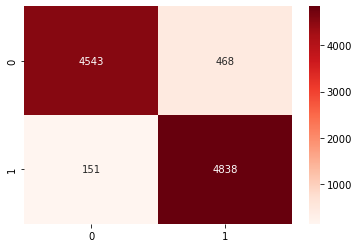

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# colormaps : cmap="YlGnBu" , cmap="Greens", cmap="Blues",  cmap="Reds"
sns.heatmap(cm_df1, annot=True, cmap="Reds", fmt='d').plot()

[]

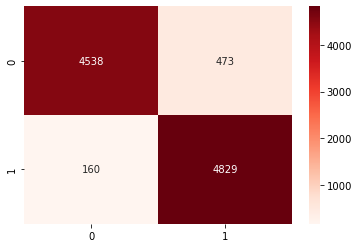

In [26]:
sns.heatmap(cm_df2, annot=True, cmap="Reds", fmt='d').plot()